# Statistische Analyse der 'category'-Spalte

Dieses Notebook führt eine kurze statistische Analyse der `category`-Spalte aus den Metadaten durch.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Konfiguration ---
METADATA_PATH = '../output/amazing_logos_v4/data/amazing_logos_v4_cleanup/metadata2.csv'

# --- Daten laden ---
try:
    df = pd.read_csv(METADATA_PATH)
    print("Metadaten erfolgreich geladen.")
except FileNotFoundError:
    print(f"Fehler: Die Datei {METADATA_PATH} wurde nicht gefunden.")
    df = None

Metadaten erfolgreich geladen.


In [2]:
# --- Statistische Analyse der 'category'-Spalte ---
if df is not None:
    # Anzahl der einzigartigen Kategorien
    num_categories = df['category'].nunique()
    print(f"Anzahl der einzigartigen Kategorien: {num_categories}")
    
    # Häufigkeitsverteilung der Kategorien
    category_counts = df['category'].value_counts()
    print("\nHäufigkeitsverteilung der Top-10 Kategorien:")
    print(category_counts.head(10))

Anzahl der einzigartigen Kategorien: 52982

Häufigkeitsverteilung der Top-10 Kategorien:
category
minimalist       25630
Real Estate       6521
Education         6500
Restaurant        6281
Food              6027
Sports            5799
Music             4683
Retail            4157
Entertainment     4116
Technology        4099
Name: count, dtype: int64


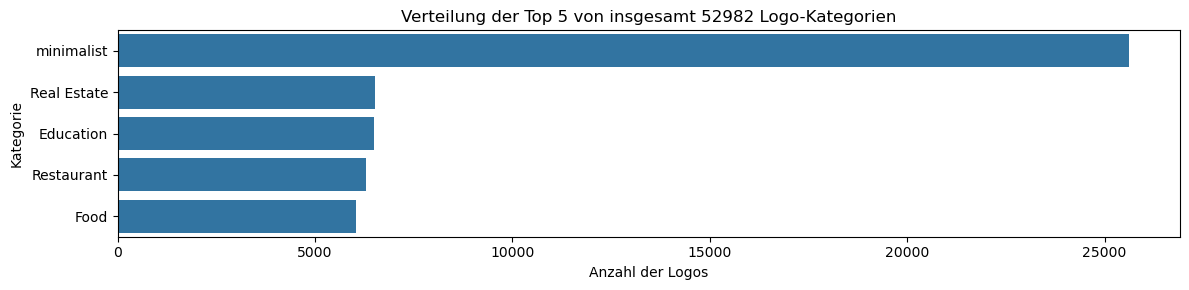

In [8]:
# --- Visualisierung der Top 20 Kategorieverteilung ---
if df is not None:
    # Da es sehr viele Kategorien gibt, beschränken wir die Darstellung auf die Top 20.
    top_n = 5
    top_categories = df['category'].value_counts().nlargest(top_n).index

    # Gesamtzahl der Kategorien für den Titel
    total_categories = df['category'].nunique()

    plt.figure(figsize=(12, 3))
    sns.countplot(y='category', data=df, order=top_categories)
    plt.title(f'Verteilung der Top {top_n} von insgesamt {total_categories} Logo-Kategorien')
    plt.xlabel('Anzahl der Logos')
    plt.ylabel('Kategorie')
    plt.tight_layout()
    plt.show()